# Dependências

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Carregando os dados

In [2]:
df = pd.read_csv('https://canvas.instructure.com/files/79840847/download?download_frd=1')
df.head()

,Cálculo1,LPT,P1,IC,Cálculo2,cra
0,8.7,10.0,9.0,9.1,8.4,8.477647
1,7.0,7.0,7.7,7.0,6.2,6.851724
2,8.6,9.8,7.9,9.6,8.7,9.090588
3,7.8,8.3,6.8,8.2,8.0,7.283516
4,5.2,9.3,5.0,8.5,5.0,7.205747


# Sumário dos Dados

In [3]:
df.describe()

,Cálculo1,LPT,P1,IC,Cálculo2,cra
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,7.200000,8.480114,7.407955,8.172727,6.323864,7.332535
std,1.228493,0.984522,1.346278,0.894007,1.293662,0.849758
min,5.000000,6.200000,5.000000,5.900000,5.000000,4.874468
25%,6.275000,7.700000,6.500000,7.500000,5.100000,6.841484
50%,7.200000,8.500000,7.750000,8.200000,5.800000,7.274746
75%,8.125000,9.300000,8.325000,8.800000,7.500000,7.883292
max,9.800000,10.000000,10.000000,10.000000,9.300000,9.090588


# Partição Treino/Teste

In [13]:
x = df[['Cálculo1', 'LPT', 'P1', 'IC', 'Cálculo2']]
y = df.cra.values

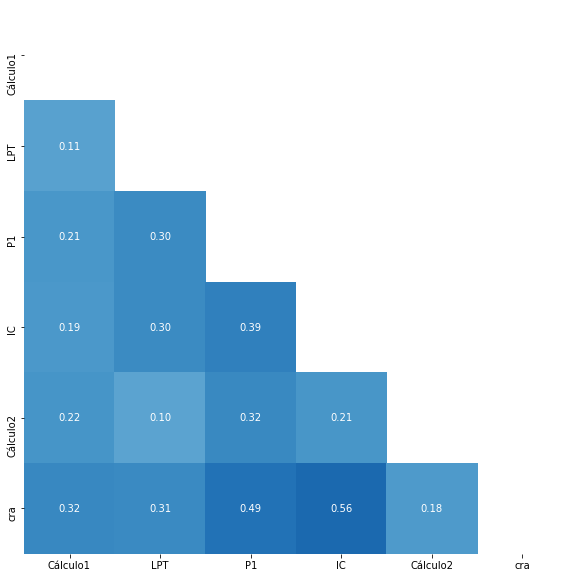

In [14]:
corr = df.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 10)
sns.heatmap(corr, ax=ax, annot=True, mask=mask, fmt='.2f', cbar=False, square=True, cmap=plt.cm.Blues, center=0)

### Se pode constatar que existe uma correlação positiva e moderada entre IC e CRA, sendo IC a variável escolhida.

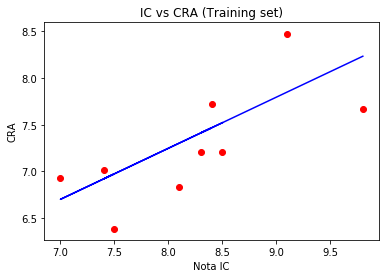

MSE: 0.17163384238722265
 r2: 0.48260399944453813


In [27]:
x = df[["IC"]]
y = df[["cra"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
cra_prediction =  model.predict(x_test)

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, cra_prediction, color = 'blue')
plt.title('IC vs CRA (Training set)')
plt.xlabel('Nota IC')
plt.ylabel('CRA')
plt.show()

print('MSE:', mean_squared_error(y_test, cra_prediction))
print(' r2:', r2_score(y_test, cra_prediction))